<h4><b>Introduction:</b></h4>
<h5>In this notebook, we will develop a model to classify images to their respective fashion category.</h5>

<h4><b>About the dataset: </b></h4>
<h5>Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.</h5>

<ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul>


<h4><b>Importing necessary libraries</b></h4>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2025-05-02 16:40:20.203622: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 16:40:21.184993: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 16:40:21.422008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746204021.746614    2642 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746204021.915384    2642 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746204022.788585    2642 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<h4><b>Loading the dataset</b></h4>

In [35]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


<h4><b>Preprocessing the data</h4></b>

In [5]:
x_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values

x_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

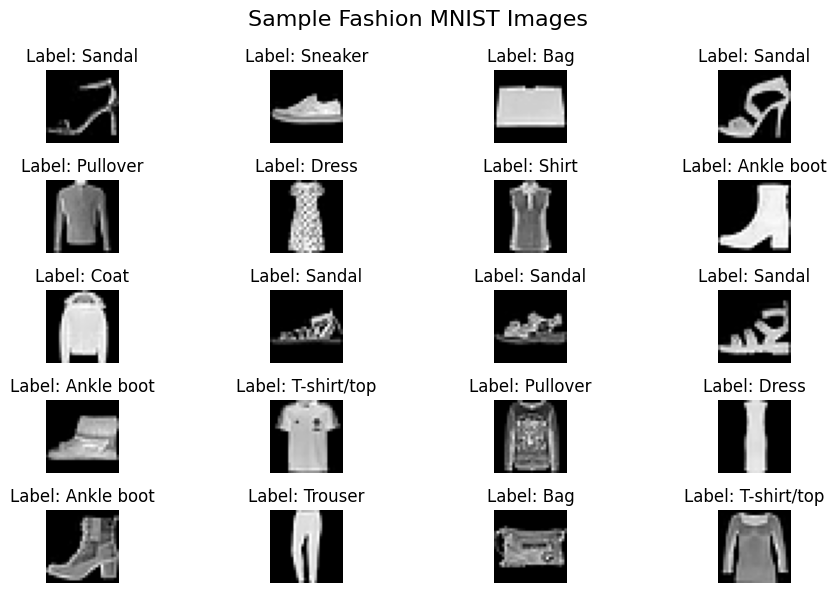

In [41]:
# Visualize a few samples from the training dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 6))
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='grey')
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Reshape to 28x28 and normalize
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0  # Reshape to 28x28 and normalize

In [8]:
from sklearn.model_selection import train_test_split
# Split the training data into a training set and a validation set (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Verify the shape of the resulting datasets
print(f"x_train shape: {x_train.shape}, x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")


x_train shape: (48000, 28, 28, 1), x_val shape: (12000, 28, 28, 1)
y_train shape: (48000,), y_val shape: (12000,)


<h4><b>Building the model</b></h4>

In [10]:
from tensorflow.keras import layers, models

# Build the deep learning model
model = models.Sequential()

# Convolutional layer (first layer): Extracts basic features like edges, textures
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer to reduce dimensionality

# Second convolutional layer: Detects more complex features
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer

# Flatten layer to convert the 2D feature maps into 1D
model.add(layers.Flatten())

# Fully connected layer: Dense layer with 128 neurons
model.add(layers.Dense(128, activation='relu'))

# Dropout layer: Helps prevent overfitting by randomly setting 20% of neurons to 0
model.add(layers.Dropout(0.2))

# Output layer: 10 neurons, one for each class (0-9), softmax activation to predict probabilities
model.add(layers.Dense(10, activation='softmax'))

# Model summary to verify the architecture
model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-02 16:45:46.476694: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
model.compile(optimizer='adam',  # Adam optimizer is an adaptive optimizer that works well in most cases
              loss='sparse_categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

Epoch 1/10


2025-05-02 16:46:12.313734: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7298 - loss: 0.7745 - val_accuracy: 0.8653 - val_loss: 0.3755
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8684 - loss: 0.3669 - val_accuracy: 0.8868 - val_loss: 0.3063
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - accuracy: 0.8901 - loss: 0.3031 - val_accuracy: 0.8956 - val_loss: 0.2872
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9023 - loss: 0.2684 - val_accuracy: 0.9018 - val_loss: 0.2590
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9083 - loss: 0.2460 - val_accuracy: 0.8992 - val_loss: 0.2657
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9173 - loss: 0.2225 - val_accuracy: 0.9101 - val_loss: 0.2432
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9254 - loss: 0.2007 - val_accuracy: 0.9071 - val_loss: 0.2558
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.9308 - loss: 0.1887 - val_accurac

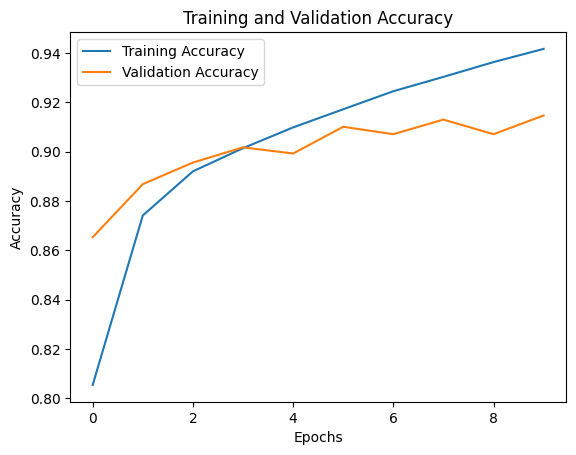

In [12]:
# Train the model on the training data and validate it on the validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [13]:
# Evaluate the model using test data that includes labels
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9148 - loss: 0.2432
Test Accuracy: 92.13%


In [18]:
# Predict the class of a new sample image from the test set
predictions = model.predict(x_test)

# The prediction will be a vector of class probabilities, we can take the argmax to get the predicted class
predicted_class = np.argmax(predictions[67])

print(f"Predicted class for first test image: {predicted_class}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted class for first test image: 9


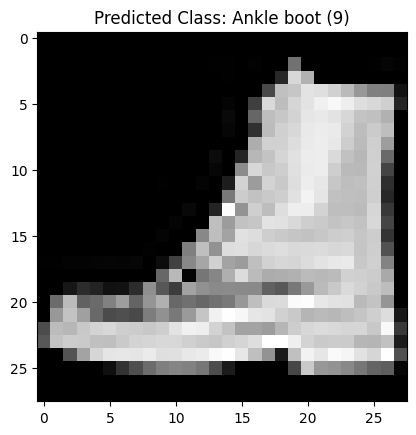

In [43]:
# Visualizing the first test image along with the predicted label
plt.imshow(x_test[67].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_class]} ({predicted_class})")
plt.show()